In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline



df = pd.read_pickle(r'pickles/df1.3.pkl')

In [2]:
df.columns

Index(['Country/Region', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Continent', 'Region', 'Continent_Asia',
       'Continent_Europe', 'Region_encoded', 'Running_Days',
       'Active/100 Cases', 'Recovered/100 Cases', 'Dead/100 Cases',
       'New Deaths', 'New Active', 'New Recovered', 'WW_Confirmed',
       'WW_Deaths', 'WW_Recovered', 'WW_Active', 'WW_New cases',
       'WW_New deaths', 'WW_New recovered', 'WW_Deaths / 100 Cases',
       'WW_Recovered / 100 Cases', 'WW_Deaths / 100 Recovered',
       'WW_No. of countries', 'r', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_7day_smoothed', 'new_tests_per_thousand_7day_smoothed',
       'Grocery and pharmacy', 'Parks', 'Residential', 'Retail and recreation',
       'Transit stations', 'Workplaces', 'c1m_school_closing',
       'c2m_workplace_closing', 'c3m_cancel_public_events',
       'c4m_restrictions_on_gatherings', 'c5m_close_public_tra

In [3]:
#1 - missing values
if df.isnull().values.any():
    print("There are missing values in the dataset.")
else:
    print("No missing values detected.")


No missing values detected.


In [4]:
#remove flags

flags = ['r_nan_flag', 'Grocery and pharmacy_missing', 'Parks_missing',
       'Residential_missing', 'Retail and recreation_missing',
       'Transit stations_missing', 'Workplaces_missing',
       'Tests_Estimated_Flag']

df = df.drop(columns=[c for c in flags if c in df.columns])

In [5]:
df.columns

Index(['Country/Region', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Continent', 'Region', 'Continent_Asia',
       'Continent_Europe', 'Region_encoded', 'Running_Days',
       'Active/100 Cases', 'Recovered/100 Cases', 'Dead/100 Cases',
       'New Deaths', 'New Active', 'New Recovered', 'WW_Confirmed',
       'WW_Deaths', 'WW_Recovered', 'WW_Active', 'WW_New cases',
       'WW_New deaths', 'WW_New recovered', 'WW_Deaths / 100 Cases',
       'WW_Recovered / 100 Cases', 'WW_Deaths / 100 Recovered',
       'WW_No. of countries', 'r', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_7day_smoothed', 'new_tests_per_thousand_7day_smoothed',
       'Grocery and pharmacy', 'Parks', 'Residential', 'Retail and recreation',
       'Transit stations', 'Workplaces', 'c1m_school_closing',
       'c2m_workplace_closing', 'c3m_cancel_public_events',
       'c4m_restrictions_on_gatherings', 'c5m_close_public_tra

In [6]:
#remove WW status (1-1 correlation to Running Days, no notable effect found in region view)

ww_cols = ['WW_Confirmed',
       'WW_Deaths', 'WW_Recovered', 'WW_Active', 'WW_New cases',
       'WW_New deaths', 'WW_New recovered', 'WW_Deaths / 100 Cases',
       'WW_Recovered / 100 Cases', 'WW_Deaths / 100 Recovered']

df = df.drop(columns=[c for c in ww_cols if c in df.columns])

In [7]:
df.columns

Index(['Country/Region', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Continent', 'Region', 'Continent_Asia',
       'Continent_Europe', 'Region_encoded', 'Running_Days',
       'Active/100 Cases', 'Recovered/100 Cases', 'Dead/100 Cases',
       'New Deaths', 'New Active', 'New Recovered', 'WW_No. of countries', 'r',
       'total_tests', 'new_tests', 'total_tests_per_thousand',
       'new_tests_per_thousand', 'new_tests_7day_smoothed',
       'new_tests_per_thousand_7day_smoothed', 'Grocery and pharmacy', 'Parks',
       'Residential', 'Retail and recreation', 'Transit stations',
       'Workplaces', 'c1m_school_closing', 'c2m_workplace_closing',
       'c3m_cancel_public_events', 'c4m_restrictions_on_gatherings',
       'c5m_close_public_transport', 'c6m_stay_at_home_requirements',
       'c7m_restrictions_on_internal_movement',
       'c8ev_international_travel_controls', 'e1_income_support',
       'e2_debt_contract_relief', 'h1_public_information_c

In [8]:
df['WW_No. of countries'].unique()

array([  6,   8,   9,  11,  13,  16,  18,  20,  24,  25,  26,  27,  28,
        30,  31,  36,  41,  47,  51,  57,  61,  66,  73,  76,  80,  84,
        93,  94,  99, 102, 105, 111, 113, 120, 133, 137, 143, 146, 150,
       154, 161, 163, 168, 169, 171, 174, 175, 176, 177, 179, 180, 182,
       183, 184, 186, 187])

In [9]:
#converting 'WW_no. of countries' into a categorical features with bins

df_day_stage = (
    df.groupby('Date')['WW_No. of countries']
    .max()
    .reset_index()
)


# Define bins and labels
bins = [0, 25, 75, 125, 175, 187]
labels = [
    'Localized Outbreak',
    'Regional Spread',
    'Global Expansion',
    'Pandemic Peak',
    'Global Saturation'
]

# Create ordered categorical column
df_day_stage['Pandemic_Status_Worldwide'] = pd.cut(
    df_day_stage['WW_No. of countries'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# Explicitly set as ordered categorical type
df_day_stage['Pandemic_Status_Worldwide'] = pd.Categorical(
    df_day_stage['Pandemic_Status_Worldwide'],
    categories=labels,
    ordered=True
)

# Create numeric code reflecting the order (0 → 4)
df_day_stage['Pandemic_Status_Code'] = df_day_stage['Pandemic_Status_Worldwide'].cat.codes


In [10]:
#merge back into df
df = df.merge(
    df_day_stage[['Date', 'Pandemic_Status_Worldwide', 'Pandemic_Status_Code']],
    on='Date',
    how='left'
)

In [11]:
df[['Date', 'WW_No. of countries', 'Pandemic_Status_Worldwide', 'Pandemic_Status_Code']].sample(frac=1).head(20)


,Date,WW_No. of countries,Pandemic_Status_Worldwide,Pandemic_Status_Code
6207,2020-01-25,11,Localized Outbreak,0
7129,2020-07-13,187,Global Saturation,4
4431,2020-05-08,186,Global Saturation,4
220,2020-02-23,31,Regional Spread,1
9693,2020-05-06,186,Global Saturation,4
10133,2020-07-09,187,Global Saturation,4
2478,2020-02-25,41,Regional Spread,1
3092,2020-04-15,184,Global Saturation,4
2873,2020-03-15,137,Pandemic Peak,3
8070,2020-07-14,187,Global Saturation,4


In [12]:
df = df.drop(columns='WW_No. of countries')

In [13]:
df.columns

Index(['Country/Region', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Continent', 'Region', 'Continent_Asia',
       'Continent_Europe', 'Region_encoded', 'Running_Days',
       'Active/100 Cases', 'Recovered/100 Cases', 'Dead/100 Cases',
       'New Deaths', 'New Active', 'New Recovered', 'r', 'total_tests',
       'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_7day_smoothed', 'new_tests_per_thousand_7day_smoothed',
       'Grocery and pharmacy', 'Parks', 'Residential', 'Retail and recreation',
       'Transit stations', 'Workplaces', 'c1m_school_closing',
       'c2m_workplace_closing', 'c3m_cancel_public_events',
       'c4m_restrictions_on_gatherings', 'c5m_close_public_transport',
       'c6m_stay_at_home_requirements',
       'c7m_restrictions_on_internal_movement',
       'c8ev_international_travel_controls', 'e1_income_support',
       'e2_debt_contract_relief', 'h1_public_information_campaigns',
       'h2_t

In [14]:
#drop Continent_Europe (no needed when we have Continent_Asia, where False = Europe)
df = df.drop(columns='Continent_Europe')


In [15]:
#drop redundant testing cols. 

testing_cols = ['total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_7day_smoothed', 'new_tests_per_thousand_7day_smoothed']

df = df.drop(columns=[c for c in testing_cols if c in df.columns])


#drop redundant GDP column
df = df.drop(columns='GDP')

#drop redundant Population column
df = df.drop(columns='Population')


In [16]:
#drop leaky columns (with 'New Deaths')

leaky = ['Deaths','Dead/100 Cases']
df = df.drop(columns=[c for c in leaky if c in df.columns])

In [17]:
df.columns

Index(['Country/Region', 'Lat', 'Long', 'Date', 'Confirmed', 'Recovered',
       'Active', 'Continent', 'Region', 'Continent_Asia', 'Region_encoded',
       'Running_Days', 'Active/100 Cases', 'Recovered/100 Cases', 'New Deaths',
       'New Active', 'New Recovered', 'r', 'total_tests', 'new_tests',
       'Grocery and pharmacy', 'Parks', 'Residential', 'Retail and recreation',
       'Transit stations', 'Workplaces', 'c1m_school_closing',
       'c2m_workplace_closing', 'c3m_cancel_public_events',
       'c4m_restrictions_on_gatherings', 'c5m_close_public_transport',
       'c6m_stay_at_home_requirements',
       'c7m_restrictions_on_internal_movement',
       'c8ev_international_travel_controls', 'e1_income_support',
       'e2_debt_contract_relief', 'h1_public_information_campaigns',
       'h2_testing_policy', 'h3_contact_tracing', 'h6m_facial_coverings',
       'Pop_Group', 'Pop_Group_encoded', 'Pop.Density', 'Density_Group',
       'Density_Group_encoded', '% aging.pop', '% young

In [18]:
#renaming coded columns 

rename_dict = {
    'c1m_school_closing': 'School_Closing',
    'c2m_workplace_closing': 'Workplace_Closing',
    'c3m_cancel_public_events': 'Public_Events_Canceled',
    'c4m_restrictions_on_gatherings': 'Gathering_Restrictions',
    'c5m_close_public_transport': 'Public_Transport_Closed',
    'c6m_stay_at_home_requirements': 'Stay_at_Home',
    'c7m_restrictions_on_internal_movement': 'Internal_Movement_Restrictions',
    'c8ev_international_travel_controls': 'International_Travel_Controls',
    'e1_income_support': 'Income_Support',
    'e2_debt_contract_relief': 'Debt_Relief',
    'h1_public_information_campaigns': 'Public_Info_Campaigns',
    'h2_testing_policy': 'Testing_Policy',
    'h3_contact_tracing': 'Contact_Tracing',
    'h6m_facial_coverings': 'Mask_Mandate'
}

df.rename(columns=rename_dict, inplace=True)

In [19]:
df.columns

Index(['Country/Region', 'Lat', 'Long', 'Date', 'Confirmed', 'Recovered',
       'Active', 'Continent', 'Region', 'Continent_Asia', 'Region_encoded',
       'Running_Days', 'Active/100 Cases', 'Recovered/100 Cases', 'New Deaths',
       'New Active', 'New Recovered', 'r', 'total_tests', 'new_tests',
       'Grocery and pharmacy', 'Parks', 'Residential', 'Retail and recreation',
       'Transit stations', 'Workplaces', 'School_Closing', 'Workplace_Closing',
       'Public_Events_Canceled', 'Gathering_Restrictions',
       'Public_Transport_Closed', 'Stay_at_Home',
       'Internal_Movement_Restrictions', 'International_Travel_Controls',
       'Income_Support', 'Debt_Relief', 'Public_Info_Campaigns',
       'Testing_Policy', 'Contact_Tracing', 'Mask_Mandate', 'Pop_Group',
       'Pop_Group_encoded', 'Pop.Density', 'Density_Group',
       'Density_Group_encoded', '% aging.pop', '% young.pop', '% healthcare',
       'GDP_billions', 'GDP_per_capita', '% smoking', 'total_tests_per_100',
   

In [20]:
#drop accumulative 

accumulative = ['Confirmed', 'Recovered','Active','total_tests']
df = df.drop(columns=[c for c in accumulative if c in df.columns])


In [21]:
df.columns

Index(['Country/Region', 'Lat', 'Long', 'Date', 'Continent', 'Region',
       'Continent_Asia', 'Region_encoded', 'Running_Days', 'Active/100 Cases',
       'Recovered/100 Cases', 'New Deaths', 'New Active', 'New Recovered', 'r',
       'new_tests', 'Grocery and pharmacy', 'Parks', 'Residential',
       'Retail and recreation', 'Transit stations', 'Workplaces',
       'School_Closing', 'Workplace_Closing', 'Public_Events_Canceled',
       'Gathering_Restrictions', 'Public_Transport_Closed', 'Stay_at_Home',
       'Internal_Movement_Restrictions', 'International_Travel_Controls',
       'Income_Support', 'Debt_Relief', 'Public_Info_Campaigns',
       'Testing_Policy', 'Contact_Tracing', 'Mask_Mandate', 'Pop_Group',
       'Pop_Group_encoded', 'Pop.Density', 'Density_Group',
       'Density_Group_encoded', '% aging.pop', '% young.pop', '% healthcare',
       'GDP_billions', 'GDP_per_capita', '% smoking', 'total_tests_per_100',
       'new_tests_per_100', 'Pandemic_Status_Worldwide',
    

In [22]:
df['GDP_billions'].unique()

array([1.524e+01, 2.890e+00, 1.264e+01, 4.340e+02, 4.269e+01, 6.137e+01,
       5.300e+02, 2.023e+01, 7.055e+01, 5.796e+01, 2.556e+01, 2.510e+02,
       3.560e+02, 3.182e+01, 2.700e+02, 2.650e+03, 1.601e+01, 3.940e+03,
       1.910e+02, 1.580e+02, 2.163e+01, 4.370e+02, 4.110e+02, 1.910e+03,
       1.710e+02, 7.720e+00, 8.270e+00, 3.338e+01, 6.410e+00, 5.741e+01,
       7.367e+01, 1.641e+01, 1.153e+01, 6.730e+00, 4.770e+00, 9.330e+02,
       1.236e+01, 3.680e+02, 6.060e+02, 2.300e+02, 2.520e+02, 1.490e+03,
       1.540e+00, 5.587e+01, 1.080e+02, 5.338e+01, 1.290e+03, 5.450e+02,
       7.420e+02, 8.130e+00, 7.200e+02, 1.570e+02, 2.700e+03, 6.644e+01])

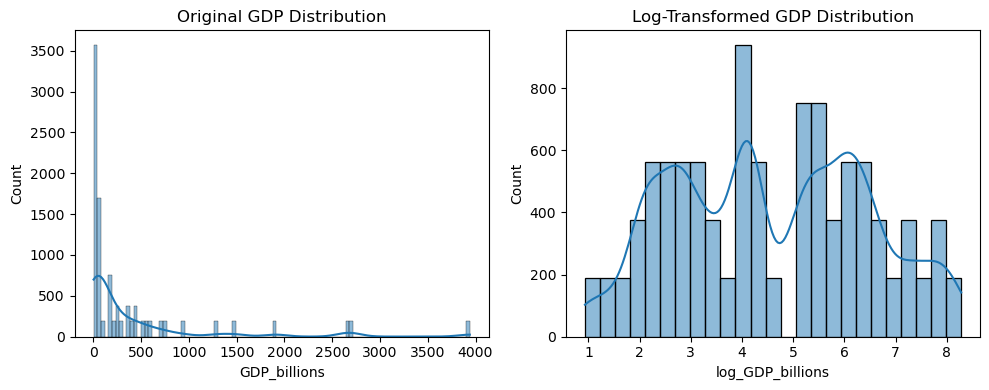

In [23]:
#log transofrms GDP_billions to handle ≈1.5 → 3940 billion range
import numpy as np

df['log_GDP_billions'] = np.log1p(df['GDP_billions'])
fig, ax = plt.subplots(1,2, figsize=(10,4))
sns.histplot(df['GDP_billions'], kde=True, ax=ax[0])
ax[0].set_title('Original GDP Distribution')

sns.histplot(df['log_GDP_billions'], kde=True, ax=ax[1])
ax[1].set_title('Log-Transformed GDP Distribution')
plt.tight_layout()
plt.show()

In [24]:
df[['log_GDP_billions', 'GDP_per_capita']].corr()

,log_GDP_billions,GDP_per_capita
log_GDP_billions,1.000000,0.052932
GDP_per_capita,0.052932,1.000000


In [25]:
df = df.drop(columns='GDP_billions')

In [26]:
df.select_dtypes(include=['number']).corr().round(2)

,Lat,Long,Region_encoded,Running_Days,Active/100 Cases,Recovered/100 Cases,New Deaths,New Active,New Recovered,r,...,Density_Group_encoded,% aging.pop,% young.pop,% healthcare,GDP_per_capita,% smoking,total_tests_per_100,new_tests_per_100,Pandemic_Status_Code,log_GDP_billions
Lat,1.00,-0.16,0.13,-0.00,0.08,0.00,0.04,0.09,0.08,0.03,...,-0.41,0.21,-0.21,0.41,0.23,-0.24,0.10,0.02,-0.00,0.31
Long,-0.16,1.00,-0.47,0.00,-0.00,-0.04,-0.10,0.07,0.24,0.02,...,-0.36,-0.51,0.62,-0.54,-0.46,0.02,-0.12,-0.06,-0.00,-0.15
Region_encoded,0.13,-0.47,1.00,0.00,0.03,0.04,0.20,0.11,0.05,-0.00,...,0.46,0.32,-0.30,0.40,0.61,-0.24,0.18,0.12,-0.00,0.45
Running_Days,-0.00,0.00,0.00,1.00,-0.08,0.76,0.01,0.04,0.14,0.44,...,0.00,0.00,0.00,-0.00,0.00,-0.00,0.46,0.19,0.83,-0.00
Active/100 Cases,0.08,-0.00,0.03,-0.08,1.00,-0.46,0.14,0.20,0.00,0.36,...,-0.02,0.06,-0.03,0.15,-0.08,0.03,-0.21,-0.05,0.25,0.18
Recovered/100 Cases,0.00,-0.04,0.04,0.76,-0.46,1.00,-0.07,-0.10,0.11,0.19,...,0.01,0.02,-0.06,-0.05,0.14,-0.02,0.45,0.18,0.58,-0.07
New Deaths,0.04,-0.10,0.20,0.01,0.14,-0.07,1.00,0.49,0.33,0.10,...,0.09,0.08,-0.05,0.23,0.01,-0.06,-0.02,0.00,0.13,0.32
New Active,0.09,0.07,0.11,0.04,0.20,-0.10,0.49,1.00,0.17,0.20,...,-0.00,0.01,0.00,0.14,-0.02,-0.04,-0.01,0.01,0.13,0.28
New Recovered,0.08,0.24,0.05,0.14,0.00,0.11,0.33,0.17,1.00,0.06,...,-0.07,-0.03,-0.01,0.04,-0.07,0.01,0.10,0.04,0.15,0.25
r,0.03,0.02,-0.00,0.44,0.36,0.19,0.10,0.20,0.06,1.00,...,-0.07,-0.05,0.00,0.10,-0.13,0.01,0.09,0.05,0.56,0.21


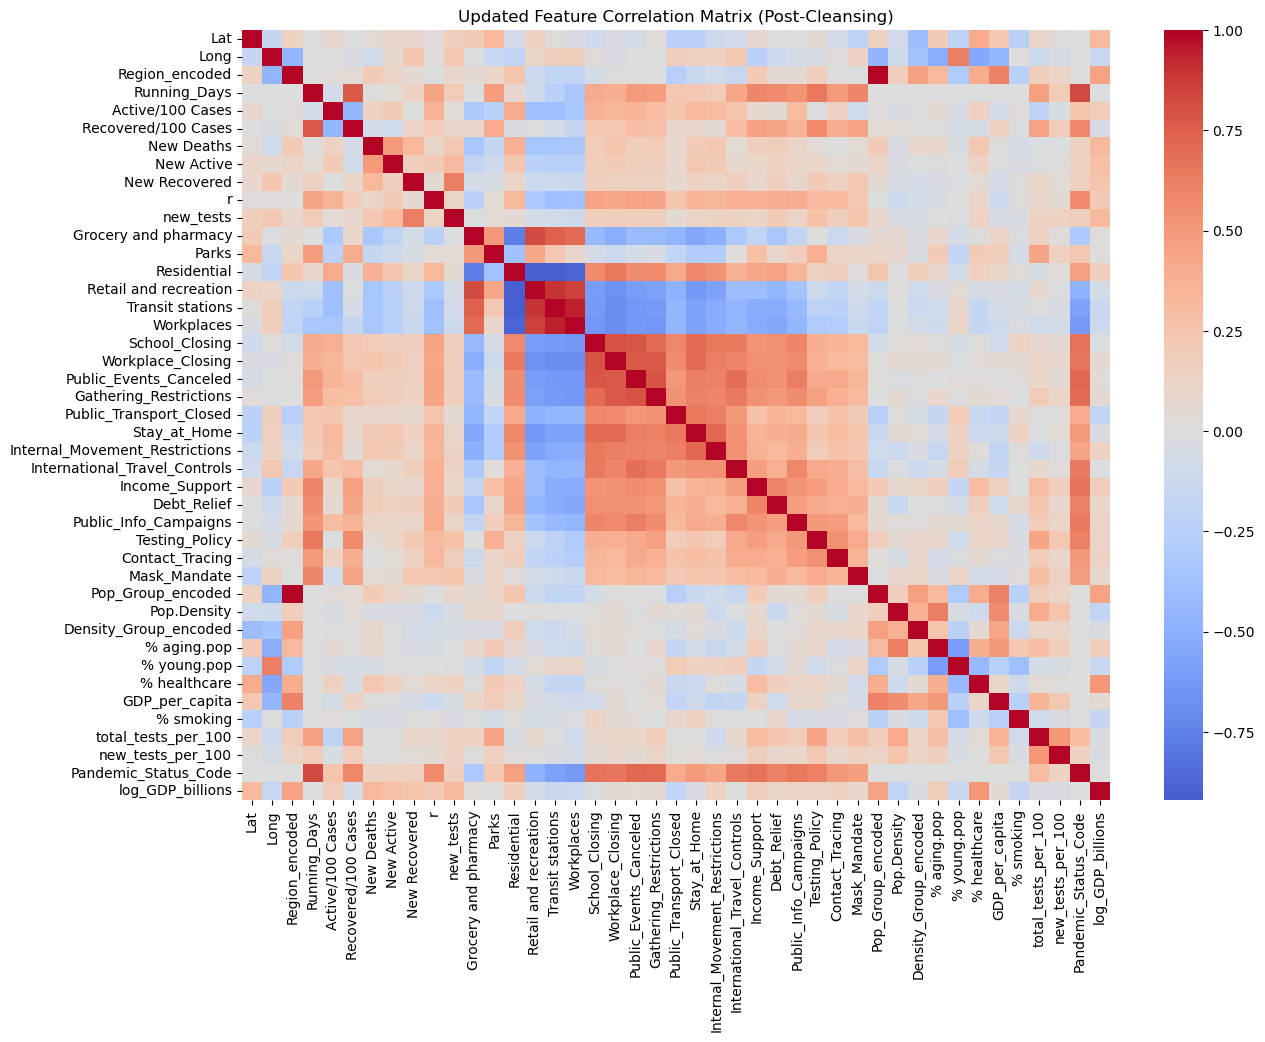

In [27]:
corr = df.select_dtypes(include=['number']).corr().round(2)
plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Updated Feature Correlation Matrix (Post-Cleansing)')
plt.show()

In [28]:
df.to_pickle(r'pickles/df3.pkl')

#categorical and datetime removal will be handled in feature engineering